# Pymaceuticals Inc.
---

### Analysis

- The sample was balanced between male and female mice, and there was a fairly even distribution across drug regimens.
- Capomulin and Ramicane resulted in the smallest tumor sizes on average.
- Distribution of tumor sizes suggests reliable data and few outliers (across four drug regimens).
- Weight is highly correlated with tumor volume, as might be expected.
- The reduction of tumor volume over the treatment period, observed in specimen s185, is encouraging.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count_initial = len(mouse_metadata["Mouse ID"].unique())
print(f'Number of mice: {mice_count_initial}')

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identify all rows where Mouse ID and Timepoint indicate a duplicate
dups_boolean = pd.DataFrame(mouse_results_df.duplicated(["Mouse ID", "Timepoint"], keep=False))

# Name the column identifying duplicates to merge with mouse_results_df and merge on index
dups_boolean_renamed = dups_boolean.rename(columns={0:"Duplicate"})
mouse_dups = pd.merge(mouse_results_df, dups_boolean_renamed, left_index=True, right_index=True)

# Identify and print unique Mouse IDs identified as duplicates
duplicates = mouse_dups.loc[mouse_dups["Duplicate"]==True]
print(f'Specimens with the following ID(s) contain duplicate entries: {duplicates["Mouse ID"].unique()}')

Specimens with the following ID(s) contain duplicate entries: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results_df.loc[mouse_results_df["Mouse ID"]=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_clean = mouse_results_df.loc[mouse_results_df["Mouse ID"]!='g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(mouse_results_clean["Mouse ID"].unique())
print(f'After removing duplicate(s), number of mice included in analysis: {mice_count_clean}')
print(f'(number of duplicates removed: {mice_count_initial-mice_count_clean})')

After removing duplicate(s), number of mice included in analysis: 248
(number of duplicates removed: 1)


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_results_grouped = mouse_results_clean.groupby("Drug Regimen")
tumor_mean_grouped = mouse_results_grouped["Tumor Volume (mm3)"].mean()
tumor_median_grouped = mouse_results_grouped["Tumor Volume (mm3)"].median()
tumor_variance_grouped = mouse_results_grouped["Tumor Volume (mm3)"].var()
tumor_stdev_grouped = mouse_results_grouped["Tumor Volume (mm3)"].std()
tumor_sem_grouped = mouse_results_grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_grouped = pd.DataFrame({"Mean":tumor_mean_grouped, "Median":tumor_median_grouped,
                                     "Variance":tumor_variance_grouped, "Standard Dev":tumor_stdev_grouped,
                                     "SEM":tumor_sem_grouped})

print("Summary Statistics of Tumor Volume by Drug Regimen")
tumor_summary_grouped

Summary Statistics of Tumor Volume by Drug Regimen


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Observations by Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of observations'>

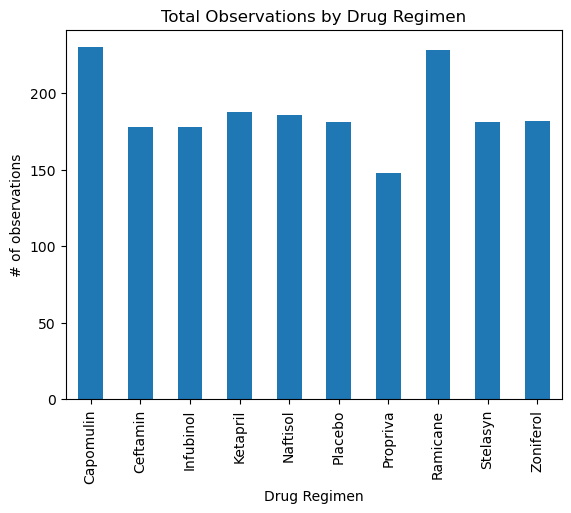

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_grouped = pd.DataFrame(mouse_results_grouped["Timepoint"].count())
timepoints_grouped.plot.bar(y="Timepoint", legend=False, ylabel="# of observations", title="Total Observations by Drug Regimen")

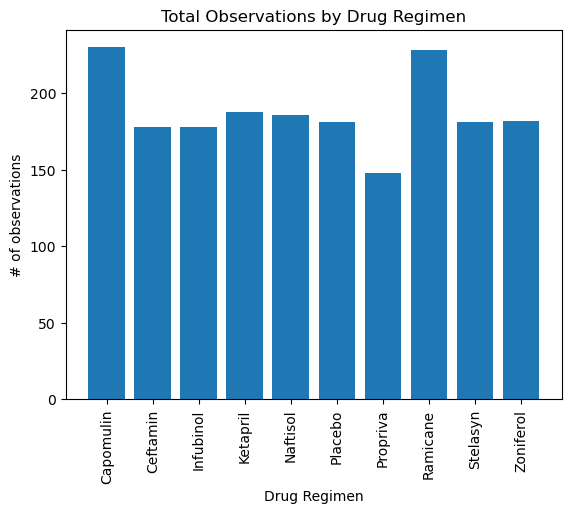

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = list(tumor_summary_grouped.index)
counts = list(timepoints_grouped["Timepoint"])

x_axis = np.arange(len(regimens))

plt.bar(regimens, counts)
plt.xticks(rotation="vertical")
plt.title("Total Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observations")
plt.show()

<Axes: ylabel='percent'>

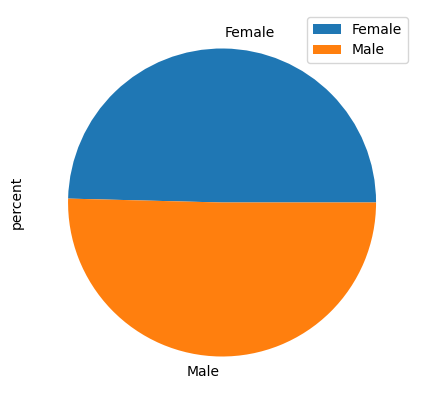

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get percentages by keeping 1 row per mouse, then grouping by sex and extracting counts by sex
mouse_sex = pd.DataFrame(mouse_results_clean.drop_duplicates(["Mouse ID"], keep="first"))
mouse_sex = mouse_sex.groupby("Sex").count()
female = mouse_sex["Mouse ID"][0]
male = mouse_sex["Mouse ID"][1]
total = mice_count_clean
per_female = female/total*100
per_male = male/total*100

sex_df = pd.DataFrame({'percent': [per_female, per_male]},
                      index=['Female', 'Male'])

sex_df.plot.pie(y='percent', figsize=(5,5), )

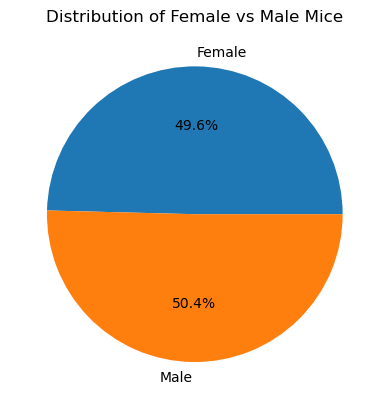

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x=[per_female, per_male], labels=["Female","Male"], autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Reduce dataframe to the four regimens of interest
four_regimens_df = mouse_results_clean.loc[((mouse_results_clean["Drug Regimen"]=="Capomulin") | 
                        (mouse_results_clean["Drug Regimen"]=="Ramicane") |
                        (mouse_results_clean["Drug Regimen"]=="Infubinol") |
                        (mouse_results_clean["Drug Regimen"]=="Ceftamin")),:]

# Drop all but the last row for each mouse to get final measurements
four_regimens_tumors = four_regimens_df.drop_duplicates(["Mouse ID"], keep="last")
four_regimens_tumors = four_regimens_tumors.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
four_regimens_tumors

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = four_regimens_tumors.loc[four_regimens_tumors["Drug Regimen"]==treatment,"Final Tumor Volume (mm3)"]
        
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    quartiles
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Determine outliers using upper and lower bounds
    print(f"The lower quartile of {treatment} tumor volumes is: {lowerq}")
    print(f"The upper quartile of {treatment} tumor volumes is: {upperq}")
    print(f"The interquartile range {treatment} tumor volumes is: {iqr}")
    print(f"The the median of {treatment} tumor volumes is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Final tumor volumes below {lower_bound} could be outliers for {treatment}.")
    print(f"Final tumor volumes above {upper_bound} could be outliers for {treatment}.")
    print("-----------------------------------------------------------------------------")

The lower quartile of Capomulin tumor volumes is: 32.37735684
The upper quartile of Capomulin tumor volumes is: 40.1592203
The interquartile range Capomulin tumor volumes is: 7.781863460000004
The the median of Capomulin tumor volumes is: 38.1251644 
Final tumor volumes below 20.70456164999999 could be outliers for Capomulin.
Final tumor volumes above 51.83201549 could be outliers for Capomulin.
-----------------------------------------------------------------------------
The lower quartile of Ramicane tumor volumes is: 31.56046955
The upper quartile of Ramicane tumor volumes is: 40.65900627
The interquartile range Ramicane tumor volumes is: 9.098536719999998
The the median of Ramicane tumor volumes is: 36.56165229 
Final tumor volumes below 17.912664470000003 could be outliers for Ramicane.
Final tumor volumes above 54.30681135 could be outliers for Ramicane.
-----------------------------------------------------------------------------
The lower quartile of Infubinol tumor volumes is:

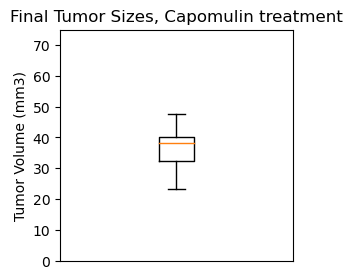

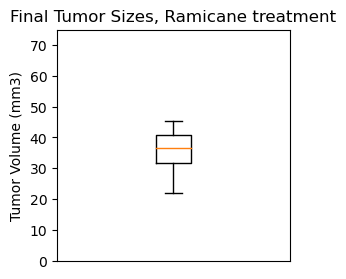

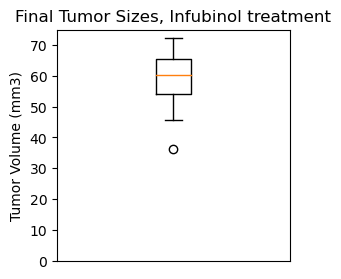

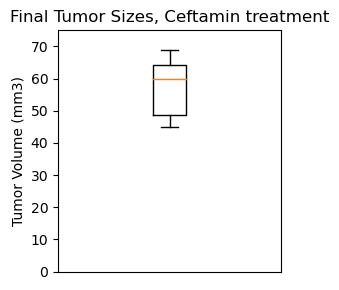

In [14]:
# Create four boxplots for each of the treatment regimens
Capomulin_tumors = four_regimens_tumors.loc[four_regimens_tumors["Drug Regimen"]=="Capomulin","Final Tumor Volume (mm3)"]
Ramicane_tumors = four_regimens_tumors.loc[four_regimens_tumors["Drug Regimen"]=="Ramicane","Final Tumor Volume (mm3)"]
Infubinol_tumors = four_regimens_tumors.loc[four_regimens_tumors["Drug Regimen"]=="Infubinol","Final Tumor Volume (mm3)"]
Ceftamin_tumors = four_regimens_tumors.loc[four_regimens_tumors["Drug Regimen"]=="Ceftamin","Final Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.set_title('Final Tumor Sizes, Capomulin treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Capomulin_tumors)
ax1.set_ylim(0,75)
ax1.set_xticks([])

fig2, ax2 = plt.subplots(figsize=(3,3))
ax2.set_title('Final Tumor Sizes, Ramicane treatment')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(Ramicane_tumors)
ax2.set_ylim(0,75)
ax2.set_xticks([])

fig3, ax3 = plt.subplots(figsize=(3,3))
ax3.set_title('Final Tumor Sizes, Infubinol treatment')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(Infubinol_tumors)
ax3.set_ylim(0,75)
ax3.set_xticks([])

fig4, ax4 = plt.subplots(figsize=(3,3))
ax4.set_title('Final Tumor Sizes, Ceftamin treatment')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(Ceftamin_tumors)
ax4.set_ylim(0,75)
ax4.set_xticks([])

plt.tight_layout()
plt.show()

## Line and Scatter Plots

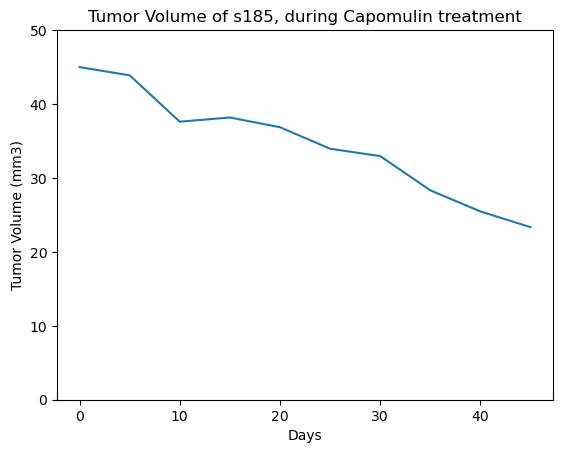

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify one Capomulin mouse
Capomulin_mice = mouse_results_clean.loc[mouse_results_clean["Drug Regimen"]=="Capomulin",:]
Capomulin_mouse = mouse_results_clean.loc[mouse_results_clean["Mouse ID"]=="s185",["Tumor Volume (mm3)","Timepoint"]]

# Isolate the desired x and y variables
tumor_volume_s185 = Capomulin_mouse["Tumor Volume (mm3)"]
timepoints_s185 = Capomulin_mouse["Timepoint"]

# Plot line
plt.plot(timepoints_s185, tumor_volume_s185)
plt.title("Tumor Volume of s185, during Capomulin treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,50)
plt.show()

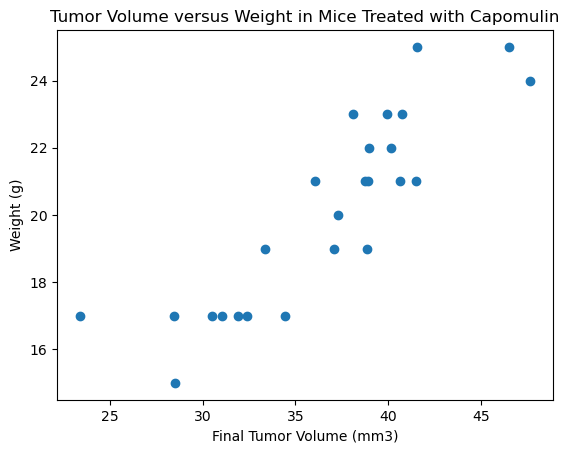

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_tumors_weight = four_regimens_tumors.loc[four_regimens_tumors["Drug Regimen"]=="Capomulin",["Final Tumor Volume (mm3)","Weight (g)"]]

x_values = Capomulin_tumors_weight["Final Tumor Volume (mm3)"]
y_values = Capomulin_tumors_weight["Weight (g)"]

plt.scatter(x_values,y_values)
plt.title("Tumor Volume versus Weight in Mice Treated with Capomulin")
plt.xlabel("Final Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

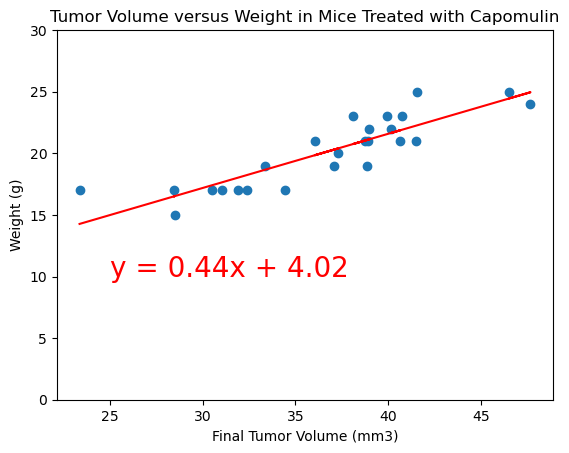

The r-squared is: 0.7686134812138998


In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Replot with regression line added
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Tumor Volume versus Weight in Mice Treated with Capomulin")
plt.xlabel("Final Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.ylim(0,30)
plt.annotate(line_eq,(25,10),fontsize=20,color="red")
plt.show()
print(f"The r-squared is: {rvalue**2}")